# LSTM based Soft-Sensor for Estimating Nitrate Concentration in Aquaponics Pond

### Import Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout

### Read the Dataset

In [5]:
data1 = pd.read_csv(r"C:\Users\pavan\Downloads\pond\IoTpond1.csv")
data2 = pd.read_csv(r"C:\Users\pavan\Downloads\pond\IoTPond2.csv")
data3 = pd.read_csv(r"C:\Users\pavan\Downloads\pond\IoTPond3.csv")
data4 = pd.read_csv(r"C:\Users\pavan\Downloads\pond\IoTPond4.csv")
data5 = pd.read_csv(r"C:\Users\pavan\Downloads\pond\IoTPond6.csv")
data6 = pd.read_csv(r"C:\Users\pavan\Downloads\pond\IoTPond7.csv")
data7 = pd.read_csv(r"C:\Users\pavan\Downloads\pond\IoTPond8.csv")
data8 = pd.read_csv(r"C:\Users\pavan\Downloads\pond\IoTPond9.csv")

C:\Users\pavan\AppData\Local\Temp\ipykernel_19952\1733774740.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data4 = pd.read_csv(r"C:\Users\pavan\Downloads\pond\IoTPond4.csv")
C:\Users\pavan\AppData\Local\Temp\ipykernel_19952\1733774740.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data6 = pd.read_csv(r"C:\Users\pavan\Downloads\pond\IoTPond7.csv")
C:\Users\pavan\AppData\Local\Temp\ipykernel_19952\1733774740.py:7: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data7 = pd.read_csv(r"C:\Users\pavan\Downloads\pond\IoTPond8.csv")


In [6]:
data1.head()

,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,2021-06-19 00:00:05 CET,1889,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
1,2021-06-19 00:01:02 CET,1890,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2,2021-06-19 00:01:22 CET,1891,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
3,2021-06-19 00:01:44 CET,1892,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
4,2021-06-19 00:02:07 CET,1893,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91


### Data Conversion to Numeric

In [7]:
data1 = data1.apply(pd.to_numeric, errors='coerce')
data2 = data2.apply(pd.to_numeric, errors='coerce')
data3 = data3.apply(pd.to_numeric, errors='coerce')
data4 = data4.apply(pd.to_numeric, errors='coerce')
data5 = data5.apply(pd.to_numeric, errors='coerce')
data6 = data6.apply(pd.to_numeric, errors='coerce')
data7 = data7.apply(pd.to_numeric, errors='coerce')
data8 = data8.apply(pd.to_numeric, errors='coerce')

### Missing Data Imputation

In [8]:
data1 = data1.fillna(data1.mean())
data2 = data2.fillna(data2.mean())
data3 = data3.fillna(data3.mean())
data4 = data4.fillna(data4.mean())
data5 = data5.fillna(data5.mean())
data6 = data6.fillna(data6.mean())
data7 = data7.fillna(data7.mean())
data8 = data8.fillna(data8.mean())

### Concatenating Datasets

In [9]:
datasets = [data1, data2, data3, data4, data5, data6, data7, data8]
data = pd.concat(datasets, ignore_index=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107595 entries, 0 to 1107594
Data columns (total 33 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   created_at               0 non-null        float64
 1   entry_id                 1107595 non-null  float64
 2   Temperature (C)          326119 non-null   float64
 3   Turbidity(NTU)           655734 non-null   float64
 4   Dissolved Oxygen(g/ml)   757239 non-null   float64
 5   PH                       1107595 non-null  float64
 6   Ammonia(g/ml)            757239 non-null   float64
 7   Nitrate(g/ml)            757239 non-null   float64
 8   Population               605454 non-null   float64
 9   Fish_Length(cm)          433205 non-null   float64
 10  Fish_Weight(g)           433205 non-null   float64
 11  Turbidity (NTU)          172249 non-null   float64
 12  Fish_Length (cm)         172249 non-null   float64
 13  Fish_Weight (g)          172249 non-null  

### Dropping Unnecessary Columns
#we are showing data1 as example

In [13]:
data1.head()

,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,NaN,1889,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
1,NaN,1890,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2,NaN,1891,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
3,NaN,1892,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
4,NaN,1893,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91


In [11]:


columns_to_drop = ['created_at', 'entry_id']
data.drop(columns=columns_to_drop, inplace=True)

### Handling Column Mismatch, Dropping Redundant Columns, and Correcting Column Names

In the previous code snippet, we observed a dataset with duplicated and mistaken column names. These inconsistencies can arise due to human error or differences in data collection processes. To ensure uniformity and consistency in the dataset, we are performing the following steps

In [9]:
data['Turbidity(NTU)'] = data['Turbidity(NTU)'].fillna(data['Turbidity (NTU)'])
data.drop(columns=['Turbidity (NTU)'], inplace=True)
data['Temperature (C)'] = data['Temperature (C)'].fillna(data['Temperature(C)'])
data.drop(columns=['Temperature(C)'], inplace=True)
data['Fish_Length(cm)'] = data['Fish_Length(cm)'].fillna(data['Fish_Length (cm)'])
data.drop(columns=['Fish_Length (cm)'], inplace=True)
data['Fish_Weight(g)'] = data['Fish_Weight(g)'].fillna(data['Fish_Weight (g)'])
data.drop(columns=['Fish_Weight (g)'], inplace=True)


In [10]:
data.rename(columns={
    'temperature(C)': 'Temperature (C)',
    'turbidity (NTU)': 'Turbidity(NTU)',
    'Dissolved Oxygen (g/ml)': 'Dissolved Oxygen(g/ml)',
    'ammonia(g/ml)': 'Ammonia(g/ml)',
    'nitrate(g/ml)': 'Nitrate(g/ml)',
    'Fish_length(cm)': 'Fish_Length(cm)',
    'Fish_weight(g)': 'Fish_Weight(g)'
}, inplace=True)

In [11]:
columns_to_keep = [
    'Temperature (C)', 'Turbidity(NTU)', 'Dissolved Oxygen(g/ml)', 'PH',
    'Ammonia(g/ml)', 'Nitrate(g/ml)', 'Fish_Length(cm)', 'Fish_Weight(g)', 'Population'
]
data = data[columns_to_keep]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107595 entries, 0 to 1107594
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Temperature (C)         827983 non-null   float64
 1   Temperature (C)         279612 non-null   float64
 2   Turbidity(NTU)          827983 non-null   float64
 3   Turbidity(NTU)          279612 non-null   float64
 4   Dissolved Oxygen(g/ml)  757239 non-null   float64
 5   Dissolved Oxygen(g/ml)  279612 non-null   float64
 6   PH                      1107595 non-null  float64
 7   Ammonia(g/ml)           757239 non-null   float64
 8   Ammonia(g/ml)           279612 non-null   float64
 9   Nitrate(g/ml)           757239 non-null   float64
 10  Nitrate(g/ml)           279612 non-null   float64
 11  Fish_Length(cm)         605454 non-null   float64
 12  Fish_Length(cm)         431397 non-null   float64
 13  Fish_Weight(g)          605454 non-null   float64
 14  Fi

In [12]:
data.isnull().sum()
###it gives total mumber of null values

Temperature (C)           279612
Temperature (C)           827983
Turbidity(NTU)            279612
Turbidity(NTU)            827983
Dissolved Oxygen(g/ml)    350356
Dissolved Oxygen(g/ml)    827983
PH                             0
Ammonia(g/ml)             350356
Ammonia(g/ml)             827983
Nitrate(g/ml)             350356
Nitrate(g/ml)             827983
Fish_Length(cm)           502141
Fish_Length(cm)           676198
Fish_Weight(g)            502141
Fish_Weight(g)            676198
Population                502141
dtype: int64

In [13]:
data = data.fillna(data.mean())

In [14]:
data.isnull().sum()

Temperature (C)           0
Temperature (C)           0
Turbidity(NTU)            0
Turbidity(NTU)            0
Dissolved Oxygen(g/ml)    0
Dissolved Oxygen(g/ml)    0
PH                        0
Ammonia(g/ml)             0
Ammonia(g/ml)             0
Nitrate(g/ml)             0
Nitrate(g/ml)             0
Fish_Length(cm)           0
Fish_Length(cm)           0
Fish_Weight(g)            0
Fish_Weight(g)            0
Population                0
dtype: int64

In [15]:
#drop duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107595 entries, 0 to 1107594
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Temperature (C)         1107595 non-null  float64
 1   Turbidity(NTU)          1107595 non-null  float64
 2   Dissolved Oxygen(g/ml)  1107595 non-null  float64
 3   PH                      1107595 non-null  float64
 4   Ammonia(g/ml)           1107595 non-null  float64
 5   Nitrate(g/ml)           1107595 non-null  float64
 6   Fish_Length(cm)         1107595 non-null  float64
 7   Fish_Weight(g)          1107595 non-null  float64
 8   Population              1107595 non-null  float64
dtypes: float64(9)
memory usage: 76.1 MB


In [17]:
data.describe()

c:\Users\pavan\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Fish_Length(cm),Fish_Weight(g),Population
count,1.107595e+06,1.107595e+06,1.107595e+06,1.107595e+06,1.107595e+06,1.107595e+06,1.107595e+06,1.107595e+06,1.107595e+06
mean,2.447215e+01,7.202060e+01,1.032387e+01,5.777290e+00,inf,6.706716e+02,1.877576e+01,8.972112e+01,5.746935e+01
std,1.041402e+00,3.784307e+01,8.791589e+00,3.042229e+00,NaN,4.528794e+02,5.774063e+00,7.758086e+01,8.460397e+00
min,-1.270000e+02,-5.700000e+01,7.000000e-03,-3.137450e+00,0.000000e+00,0.000000e+00,6.740000e+00,2.910000e+00,5.000000e+01
25%,2.400000e+01,7.202060e+01,4.969000e+00,5.006350e+00,6.777000e-01,2.890000e+02,1.712000e+01,4.305000e+01,5.000000e+01
50%,2.447215e+01,8.300000e+01,1.032387e+01,7.203450e+00,5.873916e+01,6.706716e+02,1.877576e+01,8.972112e+01,5.746935e+01
75%,2.481250e+01,1.000000e+02,1.032387e+01,7.493980e+00,NaN,8.390000e+02,1.877576e+01,8.972112e+01,5.746935e+01
max,3.050000e+01,1.000000e+02,4.498000e+01,1.623077e+01,inf,3.870000e+03,4.869000e+01,8.260000e+02,7.500000e+01


### Handling Infinite Values and Filling Missing Values with Column Means

In [18]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
column_means = data.mean()
data.fillna(column_means, inplace=True)

### Handling Negative Values in Specific Columns

In [19]:
negative_counts = (data.drop(columns=['Temperature (C)']) < 0).sum()
print(negative_counts)
#gives total number of negative values

Turbidity(NTU)            101170
Dissolved Oxygen(g/ml)         0
PH                        137557
Ammonia(g/ml)                  0
Nitrate(g/ml)                  0
Fish_Length(cm)                0
Fish_Weight(g)                 0
Population                     0
dtype: int64


In [20]:
ph_mean = data['PH'].mean()
turbidity_mean = data['Turbidity(NTU)'].mean()
data['PH'] = data['PH'].apply(lambda x: ph_mean if x < 0 else x)
data['Turbidity(NTU)'] = data['Turbidity(NTU)'].apply(lambda x: turbidity_mean if x < 0 else x)

In [21]:
negative_counts = (data.drop(columns=['Temperature (C)']) < 0).sum()
print(negative_counts)

Turbidity(NTU)            0
Dissolved Oxygen(g/ml)    0
PH                        0
Ammonia(g/ml)             0
Nitrate(g/ml)             0
Fish_Length(cm)           0
Fish_Weight(g)            0
Population                0
dtype: int64


### Visualizing Box Plots of Water Quality Features

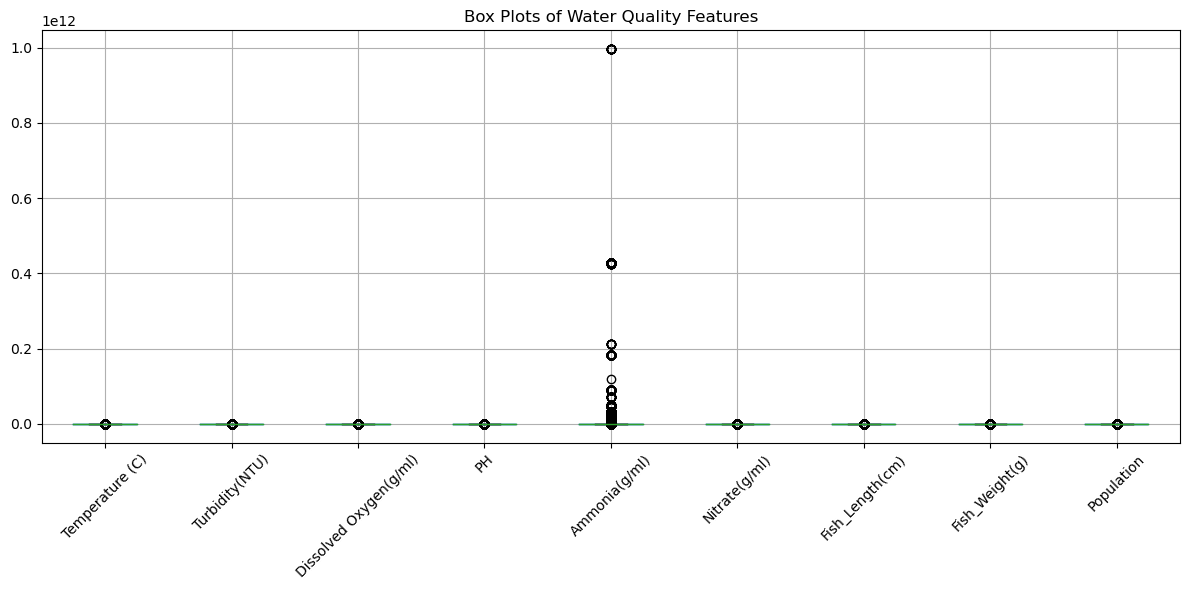

In [22]:
plt.figure(figsize=(12, 6))
data.boxplot(rot=45, grid=True, vert=True)
plt.title('Box Plots of Water Quality Features')
plt.tight_layout()
plt.show()

### Removing Outliers Using Z-Score

In [23]:
def remove_outliers_zscore(data, columns, threshold=3):
    for column in columns:
        z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
        data = data[z_scores <= threshold]
    return data

columns_to_remove_outliers = ['Temperature (C)', 'Turbidity(NTU)', 'Dissolved Oxygen(g/ml)',
                               'PH', 'Ammonia(g/ml)', 'Nitrate(g/ml)', 'Population',
                               'Fish_Length(cm)', 'Fish_Weight(g)']

data = remove_outliers_zscore(data, columns_to_remove_outliers)oo

In [24]:
data.describe()

,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Fish_Length(cm),Fish_Weight(g),Population
count,948004.000000,948004.000000,948004.000000,948004.000000,9.480040e+05,948004.000000,948004.000000,948004.000000,948004.000000
mean,24.391293,81.857234,8.976076,6.786859,7.871267e+07,646.686437,17.621871,71.676476,57.963470
std,0.700031,18.818416,5.645573,1.241733,2.374894e+08,429.772531,4.333531,44.422263,8.426072
min,21.375000,16.000000,0.007000,1.964910,0.000000e+00,1.000000,6.740000,2.910000,50.000000
25%,24.000000,72.020598,5.080000,6.513450,5.980100e-01,286.000000,15.930000,37.610000,50.000000
50%,24.472151,80.000000,10.323868,7.230690,1.509151e+02,670.671566,18.775762,89.721119,57.469354
75%,24.625000,100.000000,10.323868,7.525750,1.874596e+08,670.671566,18.775762,89.721119,57.469354
max,27.562500,100.000000,35.093000,11.234500,1.301838e+10,2034.000000,32.170000,286.400000,75.000000


### Transforming Nitrate Data

In [25]:
data['Nitrate(g/ml)'] = np.sqrt(data['Nitrate(g/ml)'])

In [26]:
data.shape

(948004, 9)

### Scaling Data Using Min-Max Scaler

In [27]:
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data)

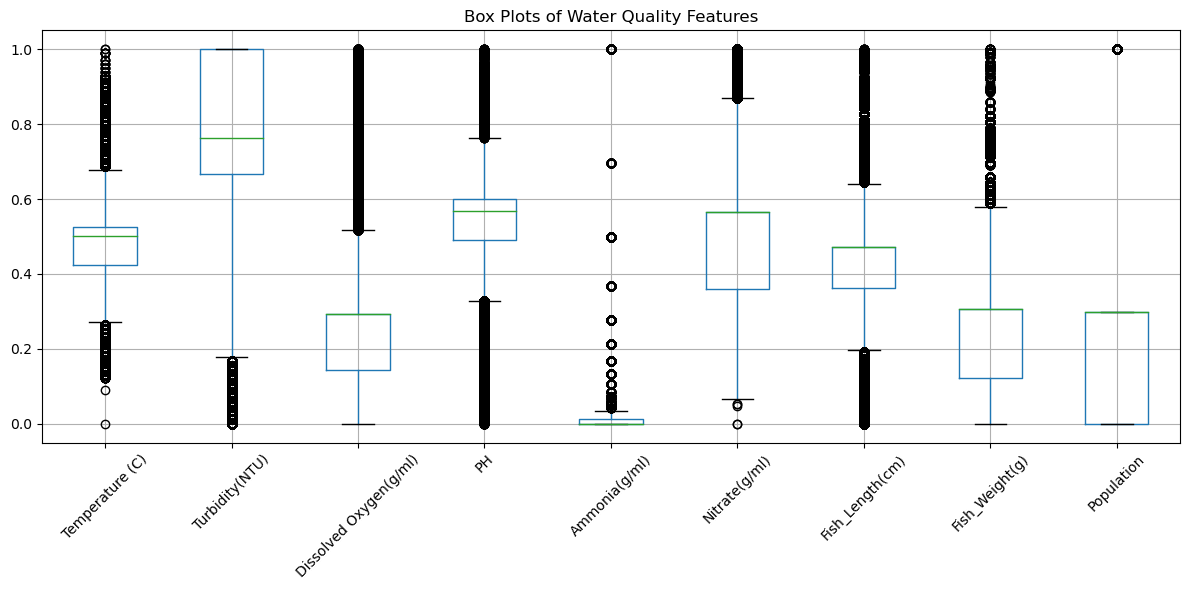

In [28]:
plt.figure(figsize=(12, 6))
data.boxplot(rot=45, grid=True, vert=True)
plt.title('Box Plots of Water Quality Features')
plt.tight_layout()
plt.show()

### Building LSTM Model 

In [29]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dropout, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming you have already defined your data and imported necessary libraries

X = data.drop(['Nitrate(g/ml)'], axis=1)
y = data['Nitrate(g/ml)']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping the data for LSTM  
n_features = X_train_scaled.shape[1]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Building the LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(512, activation='tanh', recurrent_activation='sigmoid', return_sequences=True), input_shape=(X_train_reshaped.shape[1], n_features)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(256, activation='tanh', recurrent_activation='sigmoid', return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='tanh', recurrent_activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='tanh'))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Nadam(), loss='mean_squared_error')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Predicting on test data
y_pred = model.predict(X_test_reshaped)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


c:\Users\pavan\anaconda3\lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
23701/23701 ━━━━━━━━━━━━━━━━━━━━ 1664s 70ms/step - loss: 0.0037 - val_loss: 0.0019
Epoch 2/5
23701/23701 ━━━━━━━━━━━━━━━━━━━━ 1475s 62ms/step - loss: 7.9791e-04 - val_loss: 5.7731e-04
Epoch 3/5
23701/23701 ━━━━━━━━━━━━━━━━━━━━ 1514s 64ms/step - loss: 6.4308e-04 - val_loss: 5.0891e-04
Epoch 4/5
23701/23701 ━━━━━━━━━━━━━━━━━━━━ 1493s 63ms/step - loss: 5.6219e-04 - val_loss: 4.7643e-04
Epoch 5/5
23701/23701 ━━━━━━━━━━━━━━━━━━━━ 1307s 55ms/step - loss: 5.3293e-04 - val_loss: 4.5627e-04
5926/5926 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step
Mean Squared Error: 0.00045626991412521967


### Evaluating LSTM-SS Model Performance

In [30]:
y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("-------------------------------------------------------------")
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")
print("-------------------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print("-------------------------------------------------------------")
print(model.summary())

5926/5926 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step
Mean Squared Error: 0.00045626991412521967
-------------------------------------------------------------
R-squared Score: 0.987947885612341
-------------------------------------------------------------
Mean Absolute Error: 0.01156161815780376
-------------------------------------------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1, 1024)        │     2,134,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 1024)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 1, 512)         │     2,623,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,356,934 (58.58 MB)

 Trainable params: 5,118,977 (19.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,237,957 (39.05 MB)

None


### Visualizing Actual vs Predicted Nitrate Concentration

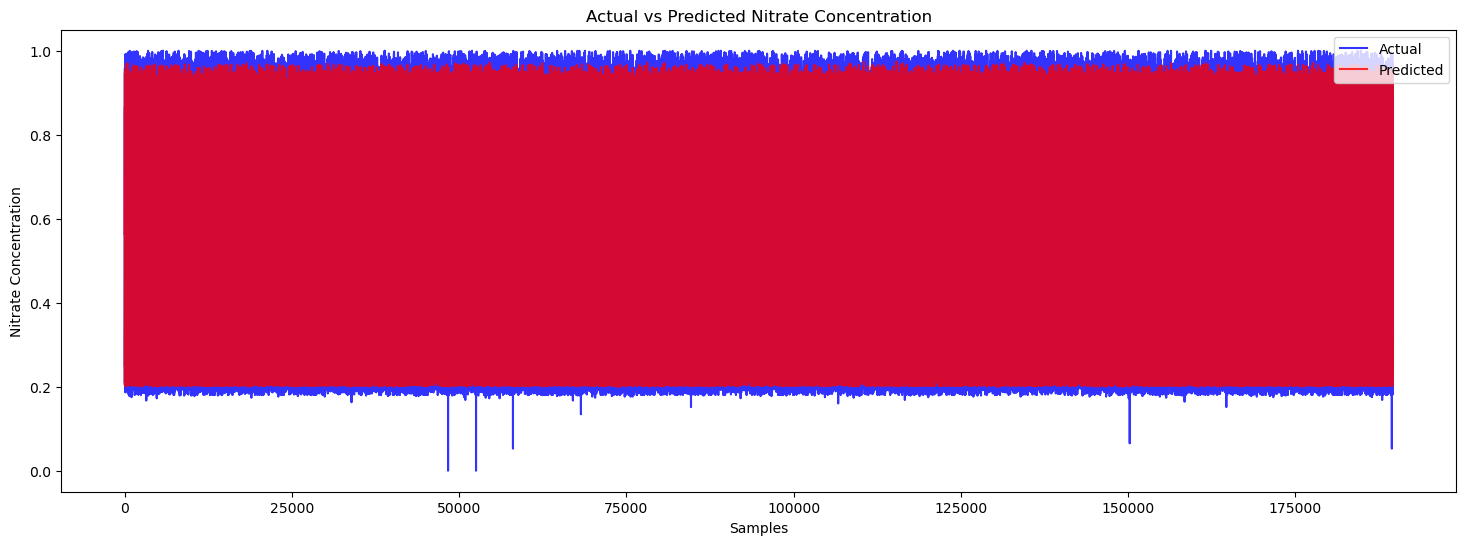

In [31]:
plt.figure(figsize=(18, 6))
plt.plot(y_test.values, label='Actual',color = 'blue',alpha=0.8)
plt.plot(y_pred, label='Predicted',color='red',alpha=0.8)
plt.title("Actual vs Predicted Nitrate Concentration")
plt.xlabel("Samples")
plt.ylabel("Nitrate Concentration")
plt.legend(loc='upper right')
plt.show()

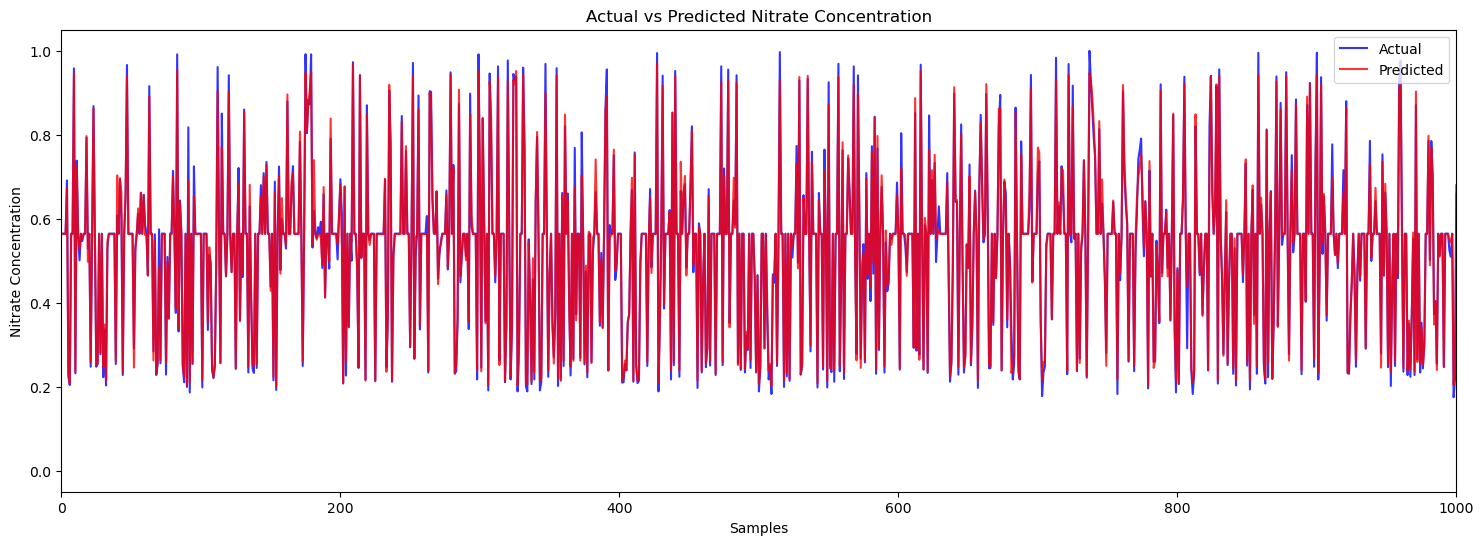

In [32]:
start_idx = 0
end_idx = 1000
plt.figure(figsize=(18, 6))
plt.plot(y_test.values, label='Actual',color = 'blue',alpha=0.8)
plt.plot(y_pred, label='Predicted',color='red',alpha=0.8)
plt.title("Actual vs Predicted Nitrate Concentration")
plt.xlabel("Samples")
plt.ylabel("Nitrate Concentration")
plt.legend(loc='upper right')
plt.xlim(start_idx, end_idx)
plt.show()

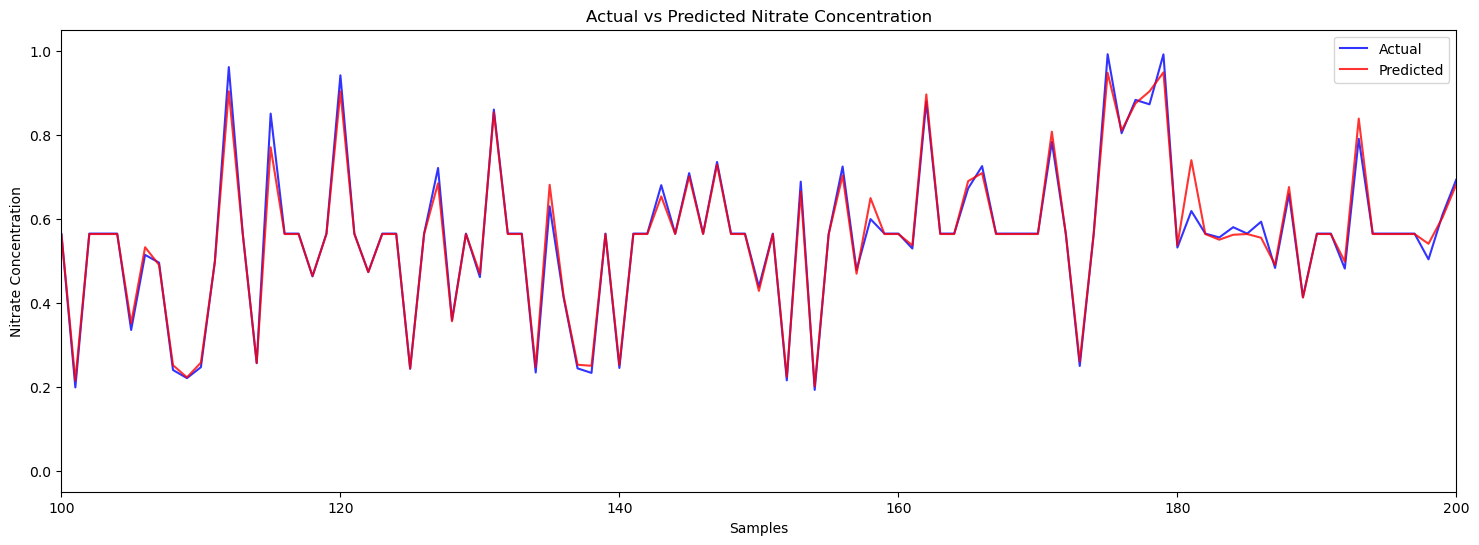

In [33]:
start_idx = 100
end_idx = 200
plt.figure(figsize=(18, 6))
plt.plot(y_test.values, label='Actual',color = 'blue',alpha=0.8)
plt.plot(y_pred, label='Predicted',color='red',alpha=0.8)
plt.title("Actual vs Predicted Nitrate Concentration")
plt.xlabel("Samples")
plt.ylabel("Nitrate Concentration")
plt.legend(loc='upper right')
plt.xlim(start_idx, end_idx)
plt.show()

### Scatter Plot of Actual vs Predicted Nitrate Concentration

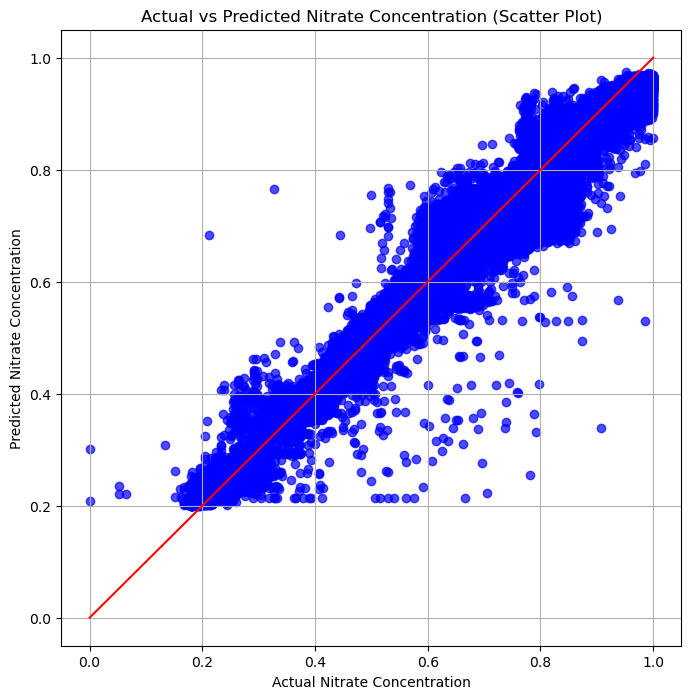

In [34]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test.values, y_pred.flatten(), color='blue', alpha=0.7)
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red')  # Diagonal line for reference
plt.title('Actual vs Predicted Nitrate Concentration (Scatter Plot)')
plt.xlabel('Actual Nitrate Concentration')
plt.ylabel('Predicted Nitrate Concentration')
plt.grid(True)
plt.show()

### Error Distribution Plot

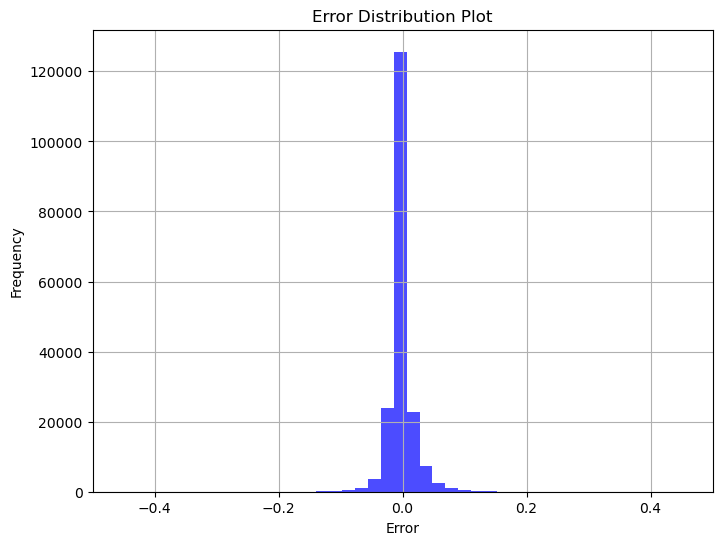

In [35]:
x_min = -0.50
x_max = 0.50
errors = y_test.values - y_pred.flatten()
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, color='blue', alpha=0.7)
plt.title('Error Distribution Plot')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(x_min, x_max)
plt.show()

### Residuals Plot: Actual vs Residuals

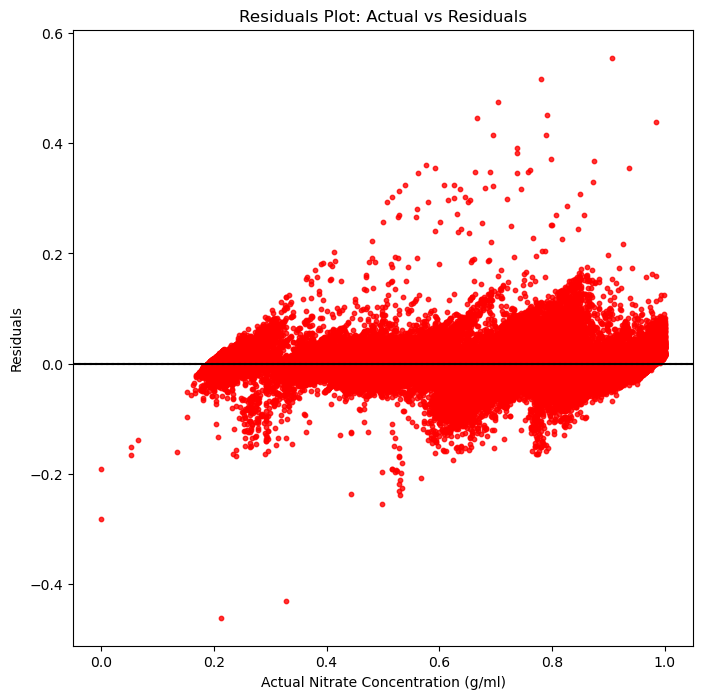

In [36]:
import seaborn as sns
residuals = y_test.values - y_pred.flatten()
plt.figure(figsize=(8, 8))
sns.residplot(x=y_test.values, y=residuals, color='yellow', scatter_kws={'color': 'red', 's': 10})
plt.axhline(y=0, color='black', linestyle='-')
plt.title('Residuals Plot: Actual vs Residuals')
plt.xlabel('Actual Nitrate Concentration (g/ml)')
plt.ylabel('Residuals')
plt.show()